## How to visualise blog [Link](https://salzi.blog/2022/05/14/waymo-open-dataset-open3d-point-cloud-viewer/)

In [1]:
from pathlib import Path

waymo_data_store = '/home/jovyan/3d_detection/OpenPCDet/data/waymo'
waymo_val_fpath = Path(waymo_data_store) / 'waymo_processed_data_v0_5_0_infos_val.pkl'
waymo_train_fpath = Path(waymo_data_store) / 'waymo_processed_data_v0_5_0_infos_train.pkl'

In [10]:
!ls {waymo_data_store}

ImageSets
raw_data
waymo_processed_data_v0_5_0
waymo_processed_data_v0_5_0_gt_database_train_sampled_1
waymo_processed_data_v0_5_0_infos_train.pkl
waymo_processed_data_v0_5_0_infos_train.pkl.dvc
waymo_processed_data_v0_5_0_infos_val.pkl
waymo_processed_data_v0_5_0_infos_val.pkl.dvc


In [ ]:
import pickle
with open(waymo_train_fpath, 'rb') as f:
    p_items = pickle.load(f)

len(p_items)

158081

In [19]:
print(p_items[0].keys())
print('point_cloud keys:', p_items[0]['point_cloud'].keys())

dict_keys(['point_cloud', 'frame_id', 'metadata', 'image', 'pose', 'annos', 'num_points_of_each_lidar'])
point_cloud keys: dict_keys(['num_features', 'lidar_sequence', 'sample_idx'])


In [34]:
def overview(d: dict):
    print('Sequence:', d['point_cloud']['lidar_sequence'])
    frame_id = int(d['frame_id'].rsplit('_', 1)[-1])
    frame_id = f'{frame_id:04d}.npy'
    print('Frame:', frame_id)
    fpath = Path(waymo_data_store) / 'waymo_processed_data_v0_5_0' /  d['point_cloud']['lidar_sequence'] / frame_id
    return fpath

frame_fld = overview(p_items[0])
!du -hs {frame_fld}

Sequence: segment-10017090168044687777_6380_000_6400_000_with_camera_labels
Frame: 0000.npy
4.3M	/home/jovyan/3d_detection/OpenPCDet/data/waymo/waymo_processed_data_v0_5_0/segment-10017090168044687777_6380_000_6400_000_with_camera_labels/0000.npy


In [46]:
!pip install --upgrade open3d-python

In [47]:
import open3d as o3d
points_object.points = o3d.utility.Vector3dVector(data)

RuntimeError: Unable to cast Python instance to C++ type (compile in debug mode for details)

NameError: name 't_low' is not defined

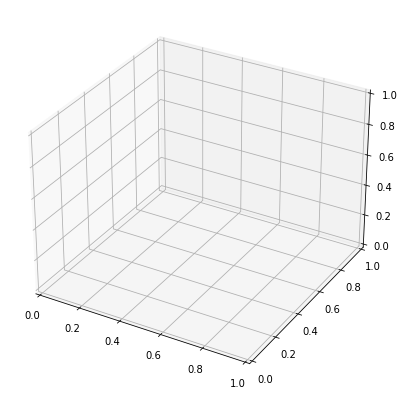

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

data = np.load(frame_fld)
print('data.shape')
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(x, y, z)
# plt.show()


fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(projection='3d')
img = ax.scatter(x, y, z, c=t_low, cmap=plt.hot())
fig.colorbar(img)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()